<a href="https://colab.research.google.com/github/gnc506/ProgFinalAssess2/blob/main/Volcanos_Assessment_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General Overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bigdf = pd.read_csv('/content/drive/MyDrive/Data Science MSc/Programming/Assessment 2/output.csv')
bigdf = bigdf.drop(bigdf.columns[0], axis=1)
bigdf = bigdf.drop([0])
bigdf

vol_data = bigdf[['Year', 'Name', 'Country', 'Type', 'Latitude', 'Longitude', 'Elevation (m)', 'VEI', 'Total Damage ($Mil)', 'Houses Destroyed', 'Total Deaths', 'Total Injuries']]
vol_data.describe()


,Year,Latitude,Longitude,Elevation (m),VEI,Total Damage ($Mil),Houses Destroyed,Total Deaths,Total Injuries
count,845.000000,845.000000,845.000000,845.000000,664.000000,26.000000,42.000000,460.000000,102.000000
mean,1837.583432,15.064574,54.994785,1972.457988,2.756024,198.078154,931.571429,725.854348,488.009804
std,281.943961,25.533988,99.632277,1249.310195,1.196069,425.089307,1890.278017,4146.191575,3303.763172
min,46.000000,-63.001000,-177.920000,-642.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1817.000000,-6.770000,-19.666000,1117.000000,2.000000,3.673000,24.000000,2.000000,3.000000
50%,1928.000000,13.257000,110.446000,1728.000000,3.000000,19.500000,85.500000,6.000000,11.000000
75%,1987.000000,36.406000,130.862000,2715.000000,3.000000,118.750000,672.750000,60.250000,42.750000
max,2023.000000,65.715000,177.180000,6377.000000,7.000000,2000.000000,9000.000000,60000.000000,31943.000000


In [ ]:
Mode_Name = vol_data['Name'].mode()[0]
Mode_Name

'Merapi'

In [ ]:
Mode_Country = vol_data['Country'].mode()[0]
Mode_Country

'Indonesia'

In [ ]:
Mode_Type = vol_data['Type'].mode()[0]
Mode_Type

'Stratovolcano'

In [ ]:
import plotly.express as px
fig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Name', hover_name='Name', title="Map Showing the Distributions of Volcanic Eruptions and their Type")
fig.show()

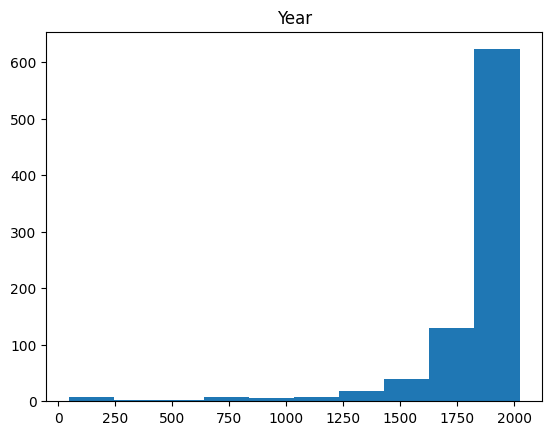

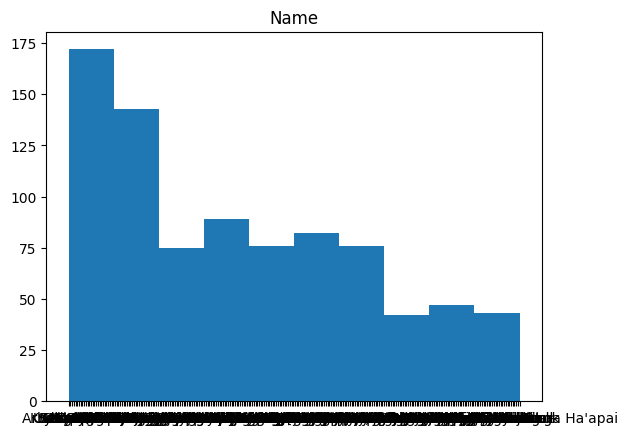

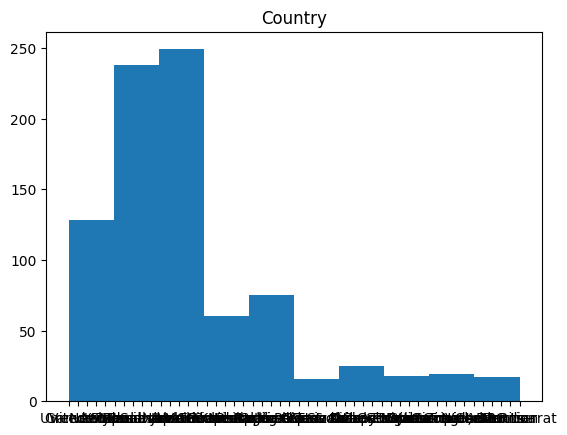

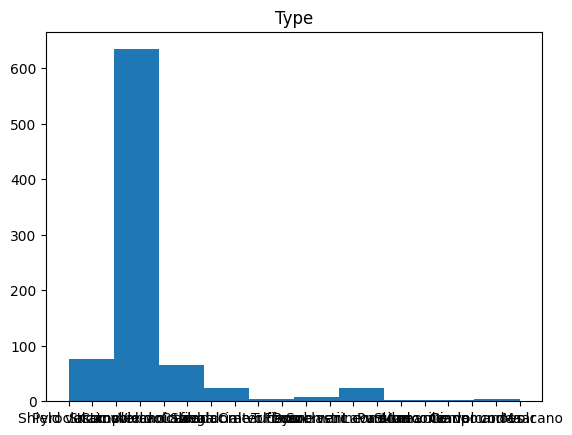

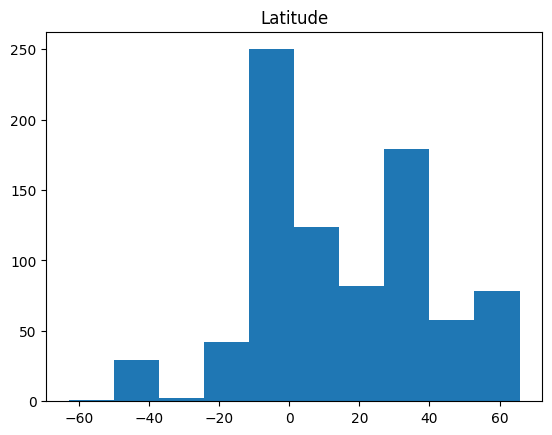

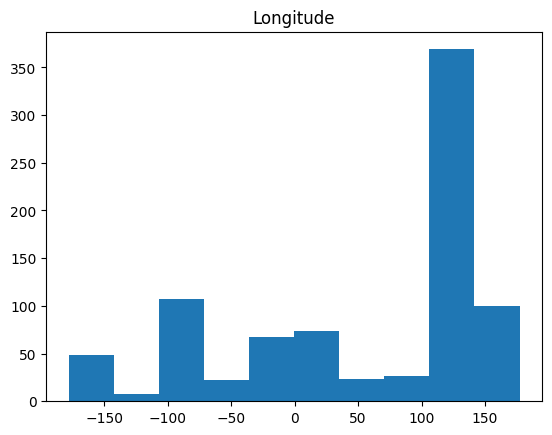

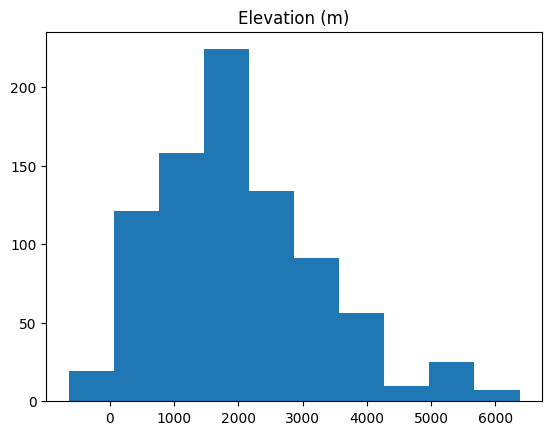

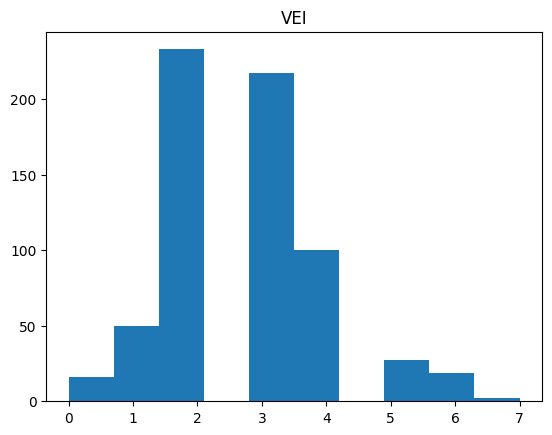

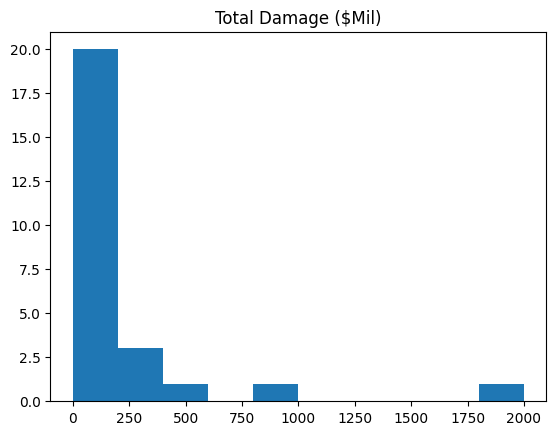

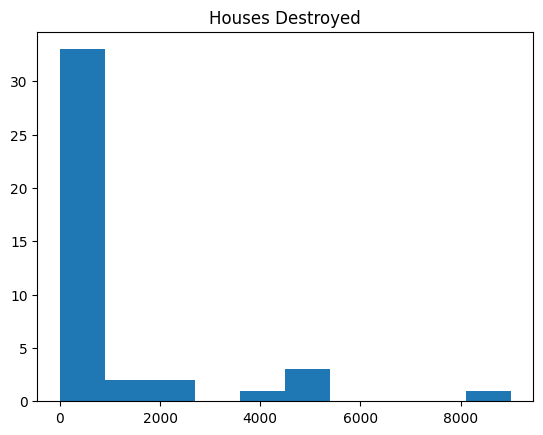

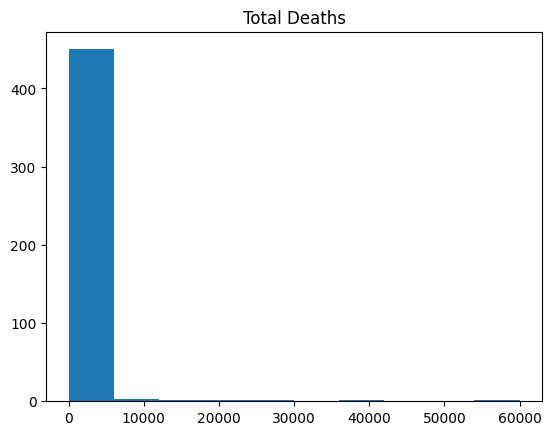

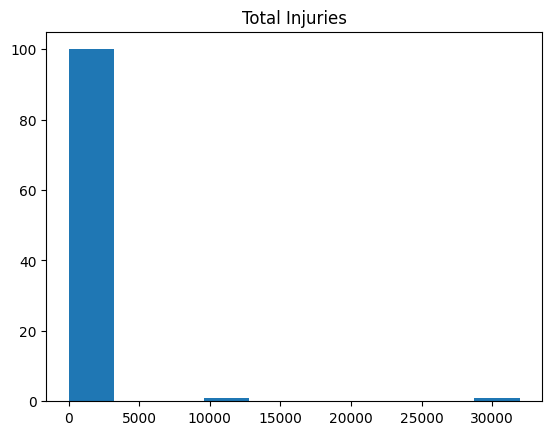

In [ ]:
#Check normality of data so correct tests can be performed
import numpy as np
import matplotlib.pyplot as plt

for col in vol_data.columns:
    plt.figure() # create a new figure
    plt.hist(vol_data[col]) # plot the histogram of the column
    plt.title(col) # set the title of the figure as the column name
    plt.show()


### Elevation and Destruction



In [ ]:
vol_data["Elevation (m)"] = vol_data["Elevation (m)"].astype(float)
fig2 = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Elevation (m)', hover_name='Name', title="Map Showing the Distribution of Volcanos and their Elevation")
fig2.show()

<ipython-input-137-874a905fbf80>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
figElevationxDeaths = px.scatter(vol_data, x='Elevation (m)', y= 'Total Deaths', title="Scatter Graph Showing a Volcanos Elevation and thee Total Deaths caused by an eruption")
figElevationxDeaths

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Deaths'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)



0.03763407923316068
0.4206752845879883


In [ ]:
figElevationxInjuries = px.scatter(vol_data, x='Elevation (m)', y= 'Total Injuries', title='Scatter Graph Showing a Volcanos Elevation and the Total Injuries caused by its eruption')
figElevationxInjuries

In [ ]:

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Injuries'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


0.004490183721642057
0.9642747352812222


In [ ]:
figElevationxDamage = px.scatter(vol_data, x='Elevation (m)', y= 'Total Damage ($Mil)', title="Scatter Graph Showing a Volcanoes Elevation and the Total Damage caused by its eruption")
figElevationxDamage

In [ ]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Damage ($Mil)'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


-0.06679237747228964
0.7457957138524334


In [ ]:
figElevationxHomes = px.scatter(vol_data, x='Elevation (m)', y= 'Houses Destroyed', title="Scatter Graph Showing a Volcanos Elevation and the Houses Destroyed by its eruption")
figElevationxHomes

In [ ]:

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Houses Destroyed'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


-0.10044644478502182
0.5267819885029088


## VEI and Destruction

In [ ]:
vol_data["VEI"] = vol_data["VEI"].astype(float)
VEIfig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='VEI', title="Map Showing the Distribution of Volcanos and their VEI")
VEIfig


<ipython-input-158-82a3da4fa715>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
figVEIxDeaths = px.scatter(vol_data, x='VEI', y='Total Deaths', title="Scatter Graph Showing a Volcanos VEI and the Total Deaths caused by its eruption")
figVEIxDeaths

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Deaths'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)



0.3948292220964943
4.575867299622441e-15


In [ ]:
figVEIxInjur = px.scatter(vol_data, x='VEI', y='Total Injuries', title="Scatter Graph Showing a Volcanos VEI and the Total Injuries caused by an eruption")
figVEIxInjur

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Injuries'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.45876843800728706
1.652042180403789e-05


In [ ]:
figVEIxDamage = px.scatter(vol_data, x='VEI', y='Total Damage ($Mil)', title="Scatter Graph Showing a Volcanos VEI and the Damage caused by its eruption")
figVEIxDamage

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Damage ($Mil)'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.063077000940408
0.8164825196945409


In [ ]:
figVEIxHomes = px.scatter(vol_data, x='VEI', y='Houses Destroyed', title="Scatter Graph Showing a Volcanos VEI and the Homes Destroyed by its eruption")
figVEIxHomes

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Houses Destroyed'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.37703138440627687
0.02557146199500289


## Type of Volcano and Desctruction

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#abel_encoder = LabelEncoder()
#vol_data['Type_encoded'] = label_encoder.fit_transform(vol_data['Type'])
#vol_data


In [ ]:
Typefig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Type', title="Map Showing the Distribution of Volcanos and their Type")
Typefig

In [ ]:
Type_to_number = {'Shield volcano':1, 'Pyroclastic shield':2, 'Stratovolcano':3, 'Complex volcano':4, 'Volcanic field':5, 'Caldera':6, 'Lava dome':7, 'Subglacial volcano':8, 'Crater rows':9, 'Tuff cone':10, 'Fissure vent':11, 'Pyroclastic cone':12, 'Submarine volcano':13, 'Lava cone':14, 'Punice cone':14, 'Mud volcano':15, 'Submarine volcanoes':16, 'Cinder cone':17, 'Compound volcano':18, 'Maar':19}
vol_data['Type label'] = vol_data['Type'].map(Type_to_number)
vol_data

<ipython-input-175-00d082c7f505>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Name,Country,Type,Latitude,Longitude,Elevation (m),VEI,Total Damage ($Mil),Houses Destroyed,Total Deaths,Total Injuries,Type label
1,46.0,Santorini,Greece,Shield volcano,36.404,25.396,367.0,3.0,NaN,NaN,NaN,NaN,1.0
2,50.0,Ambrym,Vanuatu,Pyroclastic shield,-16.250,168.120,1334.0,6.0,NaN,NaN,NaN,NaN,2.0
3,60.0,Churchill,United States,Stratovolcano,61.380,-141.750,5005.0,6.0,NaN,NaN,NaN,NaN,3.0
4,79.0,Vesuvius,Italy,Complex volcano,40.821,14.426,1281.0,5.0,NaN,NaN,2100.0,NaN,4.0
5,200.0,"Arhab, Harra of",Yemen,Volcanic field,15.630,44.080,3100.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2022.0,Popocatepetl,Mexico,Stratovolcano,19.023,-98.622,5393.0,2.0,NaN,NaN,1.0,NaN,3.0
842,2022.0,Stromboli,Italy,Stratovolcano,38.789,15.213,924.0,2.0,NaN,NaN,NaN,NaN,3.0
843,2022.0,Stromboli,Italy,Stratovolcano,38.789,15.213,924.0,2.0,NaN,NaN,NaN,NaN,3.0
844,2023.0,Bagana,Papua New Guinea,Lava cone,-6.137,155.196,1855.0,NaN,NaN,NaN,NaN,NaN,14.0


In [ ]:
TypeDeath = px.bar(vol_data, x='Type', y='Total Deaths', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Deaths from Eruptions")
TypeDeath

In [ ]:
#import numpy as np
#from scipy.stats import chi2_contingency

#observed_data = np.array([vol_data['Total Deaths'].dropna().values, vol_data['Type label'].dropna().values])
#observed_data = np.transpose(observed_data)

#chi2_stat, p_value= chi2_contingency(observed_data)
#print(chi2_stat)
#print(p_value)



In [ ]:
TypeInjur = px.bar(vol_data, x='Type', y='Total Injuries', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Injuries from Eruptions")
TypeInjur

In [ ]:
TypeDamage = px.bar(vol_data, x='Type', y='Total Damage ($Mil)', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Damage from Eruptions")
TypeDamage

In [ ]:
TypeHomes = px.bar(vol_data, x='Type', y='Houses Destroyed', color='Name', title="Bar Graph Showing Types of Volcanos and their Houses Destroyed from Eruptions")
TypeHomes